# What Markers to Include?

This notebook fits the CORG pipeline for the following two functionalities: 

1. We identify the the CA dimension that best separates high and low labeled markers (via CORG functionality 1, logistic regression)
2. We identify the direction across all dims that best separates high and low labelled markers. (CORG functionality 2, multivariate logistic regression) 

The aim with this approach is to:
- Identify which CA dim was the best
- Identify which model was the best 
- Identify whether a new dim would be better than the CA dims

Data: 
- The pipeline takes the CA coordinates calculated from all markers and followers in each of the nine models, and then, based on the labelled markers within these, calculates the two functionalities. 
- The idea is then that a full projection can be done for the best model, projecting all coordinates of markers and users that were not labelled, onto the newly identified dimension. 

Potential Issue:
- The CORG methodology might be problematic since we don't have a good span of data variables in high and low categories



In [6]:
# Standard library imports
import sys
import importlib

# Third party imports
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns
import prince
from networkx.algorithms import bipartite
from netgraph import Graph
import community as community_louvain
import requests
from mpl_toolkits.mplot3d import Axes3D
import spacy
import textnets as tn
import cairocffi
import nltk
import importlib
import numpy as np



# Local application imports
sys.path.insert(0, '../Utility files')
import utils2
from utils2 import *

import corg_pipeline
from corg_pipeline import *

# corg imports
from corg import DiscoverDimension, BenchmarkDimension

## CORG for assessing models

Link to Pedro's GitHub with the tutorial https://github.com/pedroramaciotti/CORG/blob/main/tutorial/CORG_quickstart.ipynb

### 1) Best CA dimensions

Constructed file path: /home/livtollanes/NewData/coordinates/m8_coords/m8_column_coordinates.csv
Outputs for CORG functionality 1. Model number 8
            twitter_name  label      type        type2         0         1  \
1164204  FortuneMagazine    1.0  magazine  information  0.150220 -0.369730   
743956         GQ_France    1.0  magazine  information  1.193953 -0.160987   
1012421       HarvardBiz    1.0  magazine  information -0.218905 -0.368146   
1082291       InvestirFr    1.0  magazine  information -0.142483 -0.218973   
668759      Madamefigaro    1.0  magazine  information  1.560257 -0.579953   

                2         3  
1164204  0.188437 -0.296993  
743956  -0.420749 -0.551254  
1012421 -0.126465 -0.454144  
1082291  0.543056 -0.325566  
668759  -0.256673 -0.687124  
label
1.0    7
0.0    2
Name: count, dtype: int64


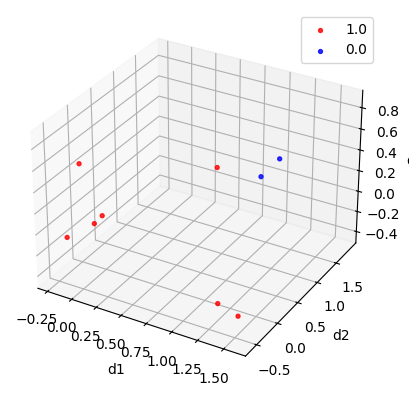

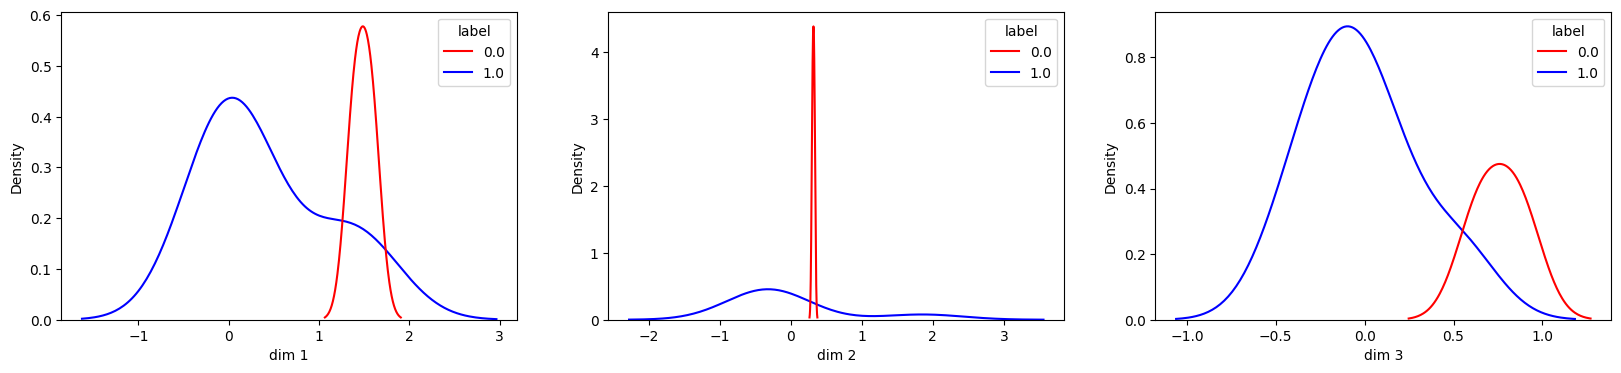

Dimension 0: Precision=0.778, Recall=1.000, F1-score=0.875
Dimension 1: Precision=0.778, Recall=1.000, F1-score=0.875
Dimension 2: Precision=0.778, Recall=1.000, F1-score=0.875


In [2]:
#CORG func 1 for model n. Input model number in order to run
m = CorgPipeline(file_number=8, n_dimensions=3)
m.func1()

### 2) Spatial dimension across n CA dims

Constructed file path: /home/livtollanes/NewData/coordinates/m2_coords/m2_column_coordinates.csv
Outputs for CORG functionality 2. Model number 2
Decision boundary:
[1.6626640890714495, -0.1692707214297914, -0.15131773339762092, 0.6075483503840519]
Hyperplane Unit Normal (new found direction):
[0.9908047395741978, -0.100870785726445, -0.09017234955481432]
Functionality 2 metrics for model number 2
Precision=0.889, Recall=0.842, F1-score=0.865, 


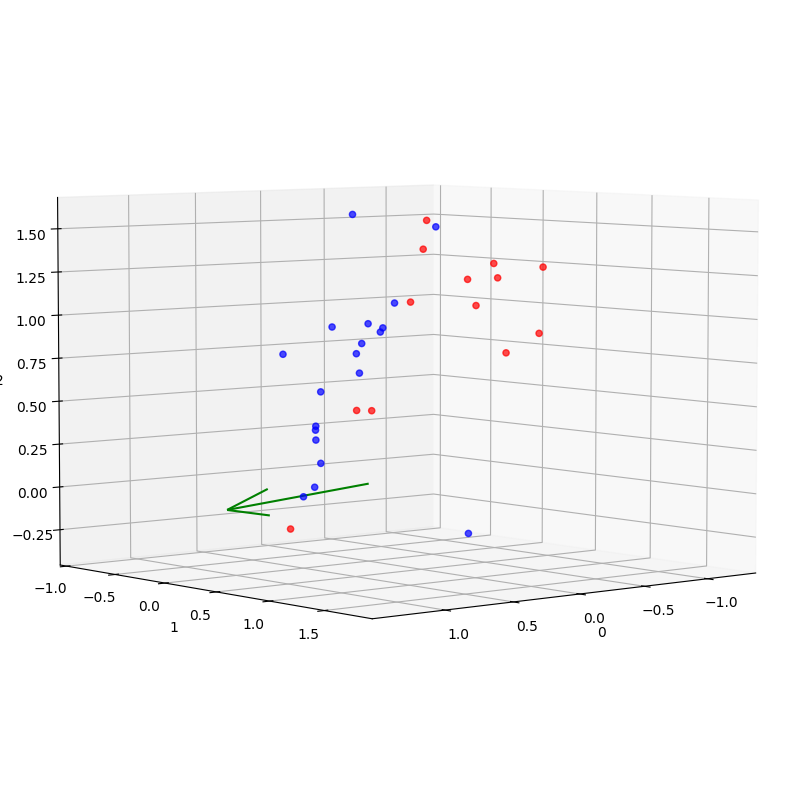

In [27]:
#CORG functionality 2 for model n. Input model number in order to run
m = CorgPipeline(file_number=2, n_dimensions=3)
m.func2()

Precision:
- Out of all the positive predictions we made, how many were true?

Recall:
- Out of all the data points that should be predicted as true, how many did we correctly predict as true?

F1:
- A combination of the two. how well does our model balance the trade off?

## Full projection m1 

### Markers

In [3]:
#Load m1 data for markers

path = '/home/livtollanes/NewData/coordinates/m1_coords'
file = '/m1_column_coordinates.csv'
marker_1 = pd.read_csv(path+file, index_col=0)

#drop dim 4
marker_1 = marker_1.drop(columns=['3'])


#Load the full edgelist with type labels to plot 
path = '/home/livtollanes/NewData/french/'
file = '/french_edgelist_marker_threshold.csv'
edgelist_types = pd.read_csv(path+file)


Constructed file path: /home/livtollanes/NewData/coordinates/m1_coords/m1_column_coordinates.csv
Outputs for CORG functionality 2. Model number 1
Decision boundary:
[-1.6439646619135526, 0.07274045553561449, 0.35077352112187704, 0.36884180107642184]
Hyperplane Unit Normal (new found direction):
[-0.9770710479529808, 0.043232433619365344, 0.20847811380432935]
Functionality 2 metrics for model number 1
Precision=0.870, Recall=0.909, F1-score=0.889, 


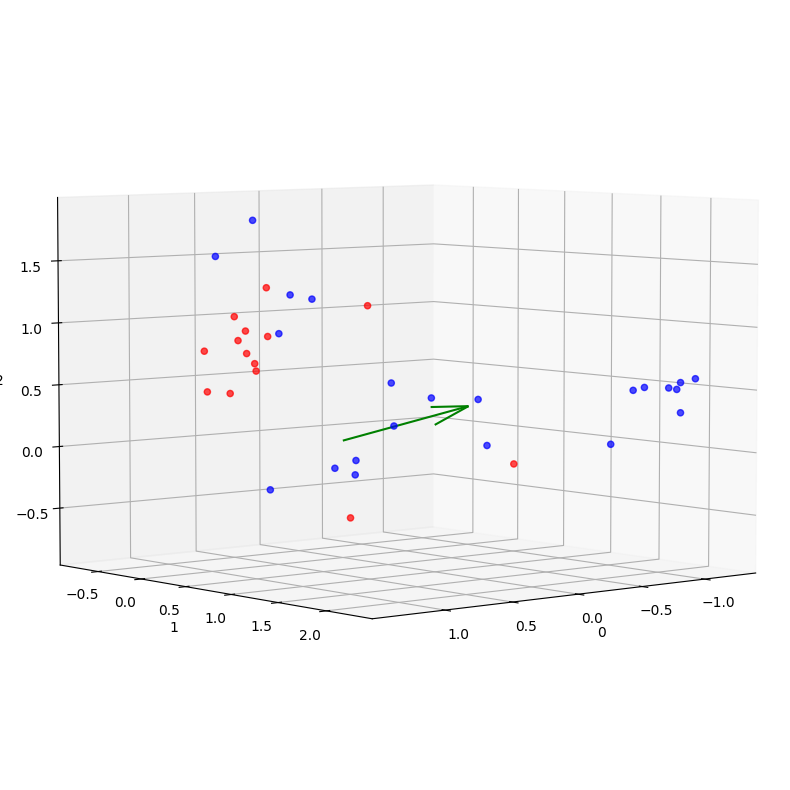

In [7]:
#CORG functionality 2 for model 1- to load the coordinates of the hyperplane unit normal (new direction vector)

m1 = CorgPipeline(file_number=1, n_dimensions=3)
m1.func2()


In [10]:
unit_normal =  m1.discover_model.decision_hyperplane_unit_normal # [-0.9770710479529808, 0.043232433619365344, 0.20847811380432935]
dimensions = ['0', '1', '2']
marker_1 = m1.create_marker_projection(unit_normal, dimensions)

In the code above, we basially projected our CA data from the full data in the three first dimensions onto our discovered best direction in space. This operation projects the data points from the CA onto the line defined by the unit normal vector. 

Given two vectors A = [A1, A2, A3] and B = [B1, B2, B3], the dot product A . B is calculated as:
- A.B = A1*B1 + A2*B2 + A3*B3

In [11]:
marker_1.head()

,twitter_name,label,type,type2,0,1,2,3,projection
947696,AUCHAN_France,0.0,grande distribution,consumption,1.048328,0.370271,0.915645,1.402604,-0.817391
898484,BurgerKingFR,0.0,chain restaurants,consumption,1.039607,0.268032,0.488989,1.114832,-0.902238
1105739,CasinoEnseignes,0.0,grande distribution,consumption,1.013608,0.400660,0.990646,1.493095,-0.766517
1068351,EDHEC_BSchool,1.0,ecoles de commerce,education,-1.062679,2.025108,0.510211,-0.181226,1.232232
1065507,EMLYON,1.0,ecoles de commerce,education,-1.099381,2.060157,0.498619,-0.209941,1.267190


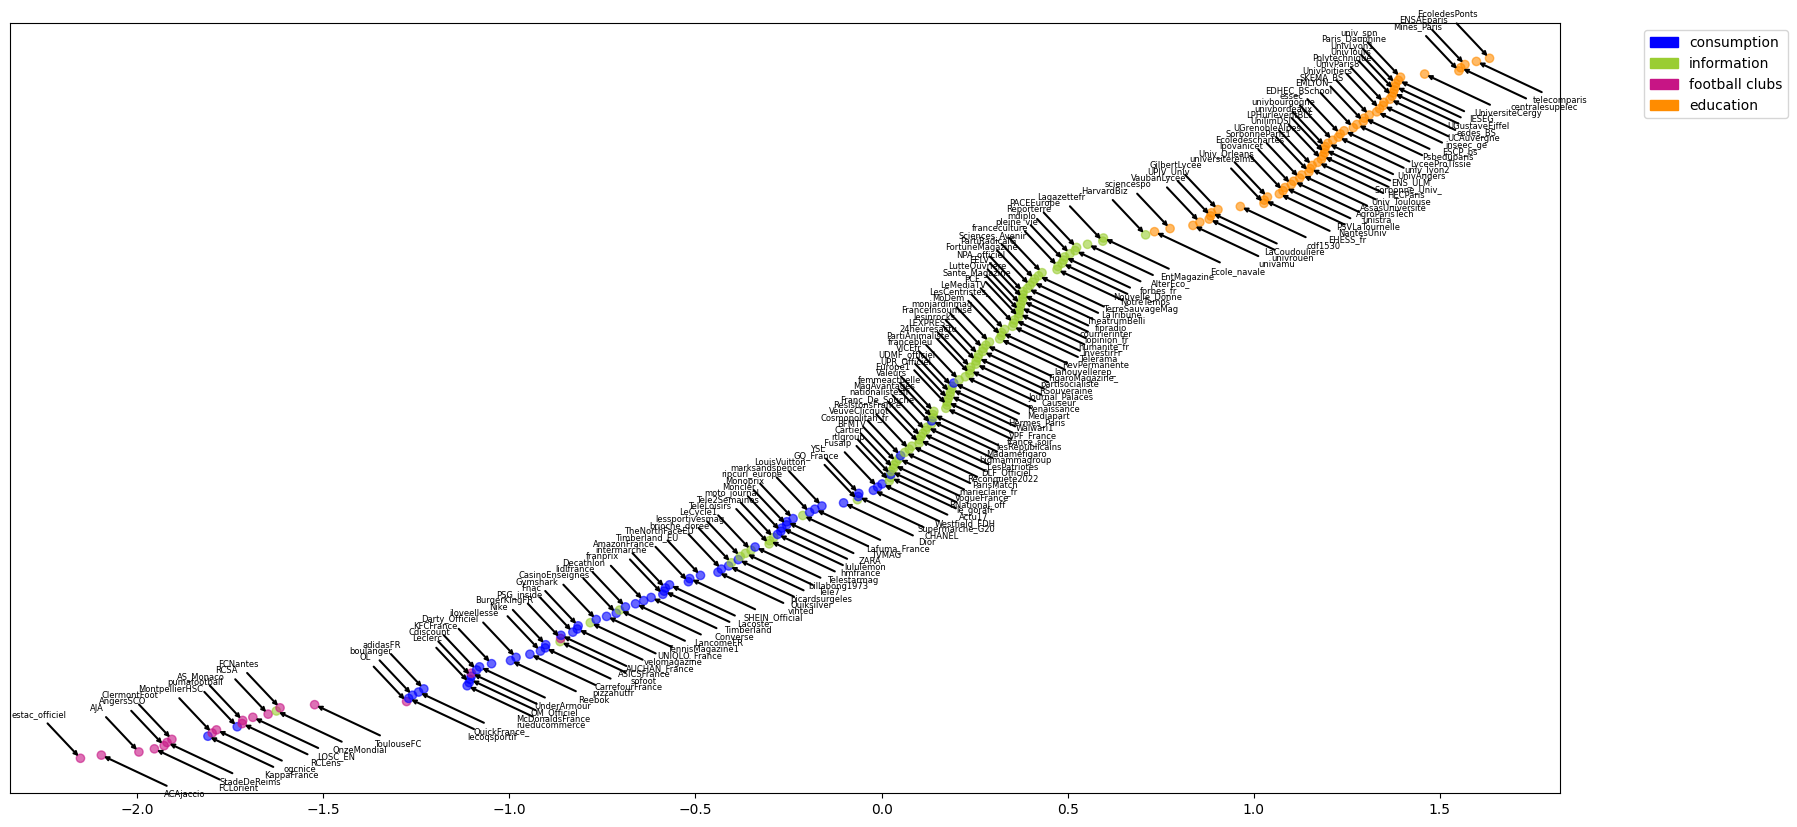

In [60]:
utils2.plot_all_brands_together(df = marker_1, dimension = 'projection')

#### interpret the plot in terms of placement of brands on ce decided upon a model that works

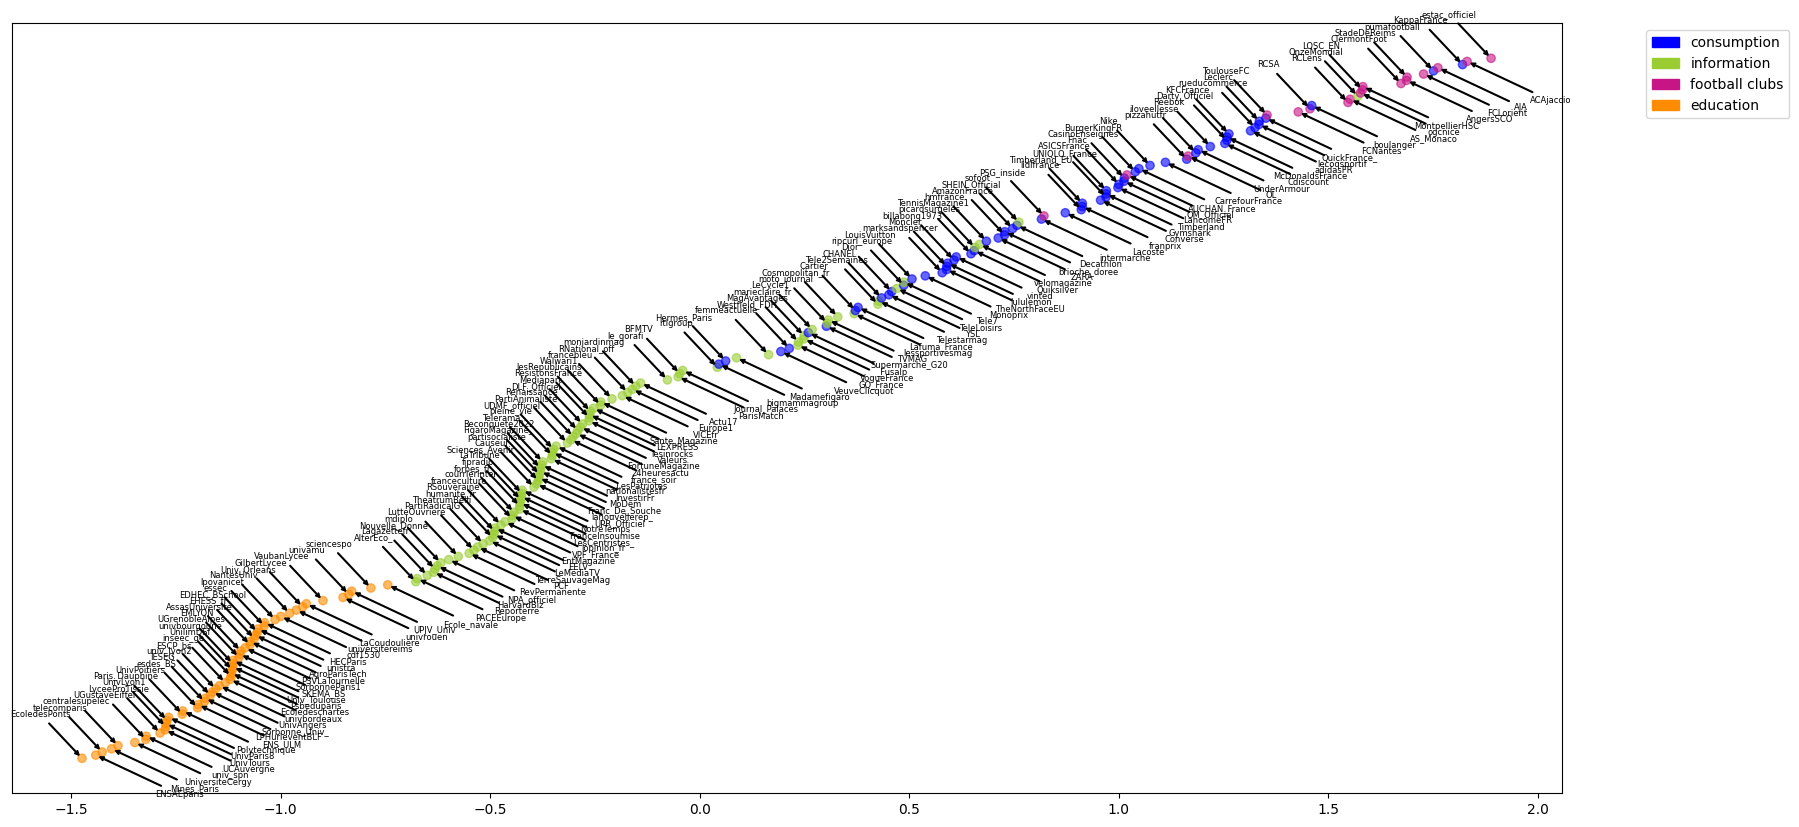

In [61]:
#Plotting dimension 1 from the original CA
utils2.plot_all_brands_together(df = marker_1,dimension= '0')

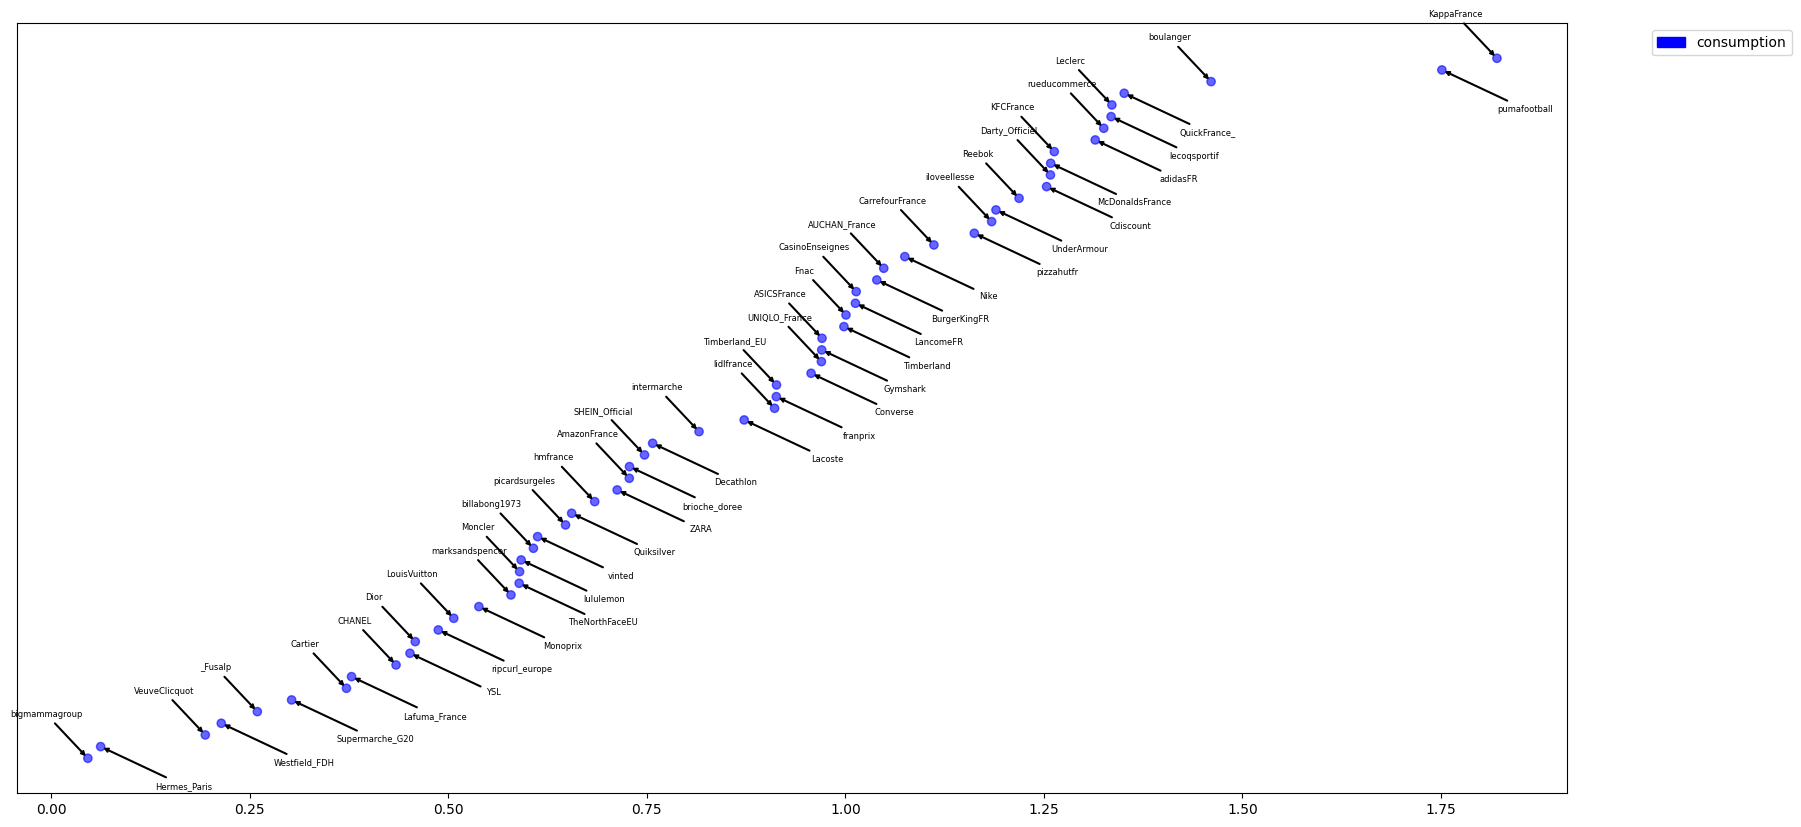

In [13]:
utils2.full_plot_function(df = marker_1, dimension= '0', types_to_plot = ['consumption'], type_style = 'new')

In [68]:
# # save marker_1 to csv

# marker_1.to_csv('/home/livtollanes/NewData/coordinates/dim_X/m1_dimx_markers.csv')

### Users

In [12]:
#Load m1 data for markers

path = '/home/livtollanes/NewData/coordinates/m1_coords'
file = '/m1_row_coordinates.csv'
user_1 = pd.read_csv(path+file)

#drop dim 4
user_1 = user_1.drop(columns=['3'])


#Load the full edgelist with type labels to plot 
path = '/home/livtollanes/NewData/french/'
file = '/french_edgelist_marker_threshold.csv'
edgelist_types = pd.read_csv(path+file)


Constructed file path: /home/livtollanes/NewData/coordinates/m1_coords/m1_column_coordinates.csv
Outputs for CORG functionality 2. Model number 1
Decision boundary:
[-1.6439646619135526, 0.07274045553561449, 0.35077352112187704, 0.36884180107642184]
Hyperplane Unit Normal (new found direction):
[-0.9770710479529808, 0.043232433619365344, 0.20847811380432935]
Functionality 2 metrics for model number 1
Precision=0.870, Recall=0.909, F1-score=0.889, 


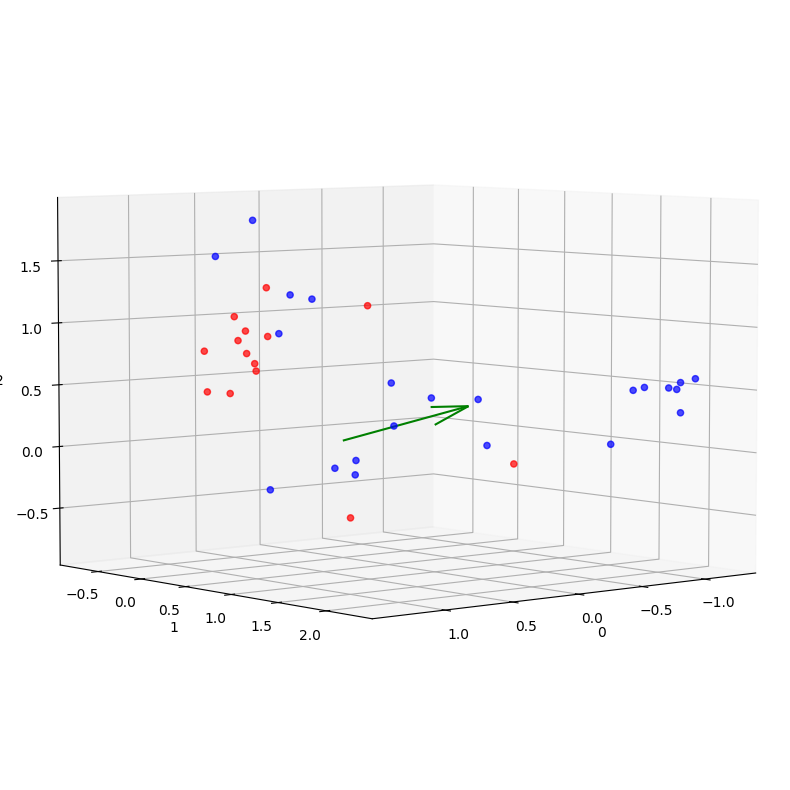

In [13]:
#CORG functionality 2 for model 1- to load the coordinates of the hyperplane unit normal (new direction vector)
importlib.reload(corg_pipeline)

m1 = corg_pipeline.CorgPipeline(1, n_dimensions=3)
m1.func2()

In [14]:
#Do the projection
importlib.reload(utils2)
unit_normal =  m1.discover_model.decision_hyperplane_unit_normal # [-0.9770710479529808, 0.043232433619365344, 0.20847811380432935]
dimensions = ['0', '1', '2']
user_1 = m1.create_user_projection(unit_normal, dimensions)

In [15]:
#Load the bios - we want to reorder the texts to match the order of the user coordinates in the new column
path = '/home/livtollanes/NewData/french/'
file = '/french1_updated.csv'
bios = pd.read_csv(path+file)

In [74]:
user_1_bios = user_1.merge(bios[['follower_id', 'screen_name', 'description_cleantext']], on='follower_id', how='left')

In [75]:
pd.set_option('display.max_colwidth', None)
user_1_bios[['screen_name', 'projection', 'description_cleantext']].head(50)

,screen_name,projection,description_cleantext
0,ObjectifDataSci,2.087315,"J'aide ceux qui se forment à la #datascience, au #machinelearning, et à l'#ia. Pour cela, j'écris ici des threads, et des articles sur mon blog (très bientôt)"
1,Smartmechanics,2.083836,La mécanique pour l'Industrie du futur. Le réseau SmartMeca distribue et vous aide à mieux utiliser vos outils #cao #simulation #essais
2,BigDataAristote,2.083836,"Ce compte est inactif depuis le 22 décembre 2016, merci de suivre le @AristoteAsso pour ne rien manquer de notre actualité !"
3,benextcompany,2.083836,"BENEXT devient OCTO Technology, une société de conseil spécialisée dans le développement logiciel et la transformation numérique."
4,StephetFred,2.083836,"HPE Education Services France vous propose des formations sur les technologies HPE mais aussi Microsoft, VMware...."
5,natalielust69,2.083836,"Actrice porno et nympho Si tu veux me rencontrer pour un plan coquin, Je réponds UNIQUEMENT ici : http://bit.ly/Natalie_Privé (Me déplace sur la France)"
6,g_lechevallier,2.083836,"Directeur d'Unité @mc2iGroupe, #Conseil en Système d'Information et organisation (#SI). Sponsor de l'offre sectorielle #Transport."
7,GroupeIngerop,2.083836,"Groupe français d'#ingénierie, Ingérop est spécialisé en #infrastructures #bâtiment #ville #mobilité #transports #eau #environnement #industrie #énergie"
8,degust_harmonie,2.083836,"Consultant, formateur et animateur en oenologiechez Dégustation et Harmonie""Mieux analyser le vin pour laisser parler vos émotions"""
9,MelvynBoukli,2.083836,Directeur Général (CEO) de @EasywaFR contact pro : melvyn@easywa.fr


In [76]:
#save user_1_bios to csv

user_1_bios.to_csv('/home/livtollanes/NewData/coordinates/dim_X/m1_dimx_users_bios.csv')

## Full projection m7

### Markers

In [77]:
#Load m7 data for markers

path = '/home/livtollanes/NewData/coordinates/m7_coords'
file = '/m7_column_coordinates.csv'
marker_7 = pd.read_csv(path+file, index_col=0)

#drop dim 4
marker_7 = marker_7.drop(columns=['3'])


#Load the full edgelist with type labels to plot 

path = '/home/livtollanes/NewData/french/'
file = '/french_edgelist_marker_threshold.csv'
edgelist_types = pd.read_csv(path+file)

Constructed file path: /home/livtollanes/NewData/coordinates/m7_coords/m7_column_coordinates.csv
Outputs for CORG functionality 2. Model number 7
Decision boundary:
[1.3550719742637876, 0.3109121241614961, 0.09789777587458585, -1.259039057393409]
Hyperplane Unit Normal (new found direction):
[0.9722661388134645, 0.22307990734811298, 0.0702417984843369]
Functionality 2 metrics for model number 7
Precision=1.000, Recall=0.333, F1-score=0.500, 


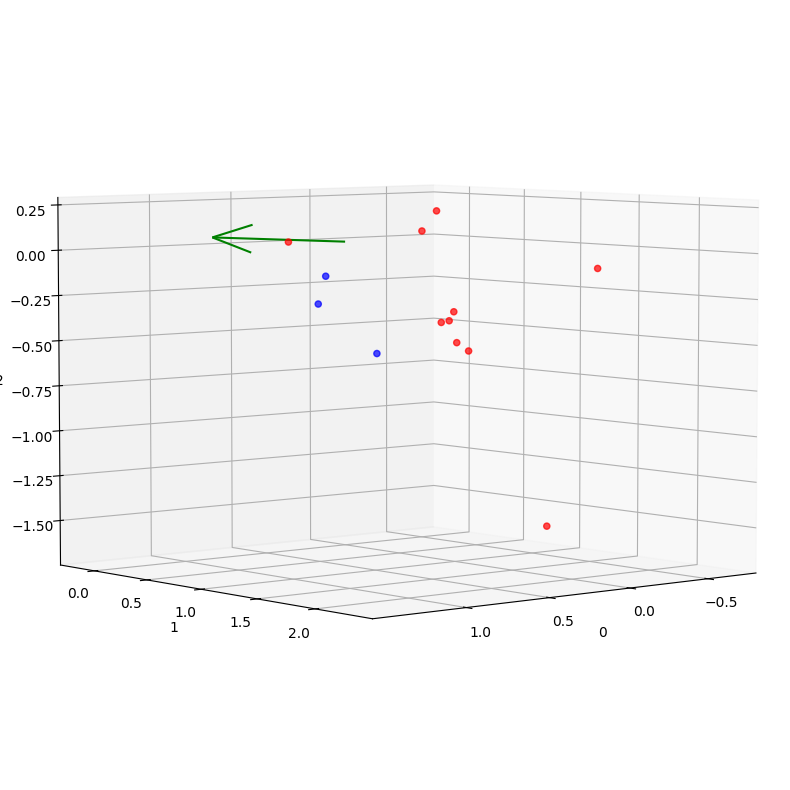

In [78]:
#CORG functionality 2 for model 1 - to load the coordinates of the hyperplane unit normal (new direction vector)
importlib.reload(corg_pipeline)

m7 = corg_pipeline.CorgPipeline(file_number=7, n_dimensions=3)
m7.func2()


In [81]:
#projection of m5 coordinates onto the new dimension
importlib.reload(utils2)

unit_normal =  m7.discover_model.decision_hyperplane_unit_normal # [-0.9770710479529808, 0.043232433619365344, 0.20847811380432935]
dimensions = ['0', '1', '2']
marker_7 = m7.create_marker_projection(unit_normal, dimensions)
marker_7 = m7.create_marker_projection(unit_normal, dimensions)

In [82]:
marker_7.head()

,twitter_name,label,type,type2,0,1,2,projection
1157208,ASICSFrance,NaN,sport,consumption,-0.034669,-0.519077,1.405710,-0.050764
947696,AUCHAN_France,0.0,grande distribution,consumption,-0.478409,0.210139,-0.478363,-0.451864
1182549,AmazonFrance,NaN,commerce,consumption,-0.700885,0.186009,-0.625302,-0.683874
898484,BurgerKingFR,0.0,chain restaurants,consumption,-0.534832,0.086971,0.161199,-0.489274
735648,CHANEL,NaN,luxe vetements et malls,consumption,1.589001,-0.055499,-0.243646,1.515436


In [83]:
#save marker_1 to csv

marker_7.to_csv('/home/livtollanes/NewData/coordinates/dim_X/m7_dimx_markers.csv')

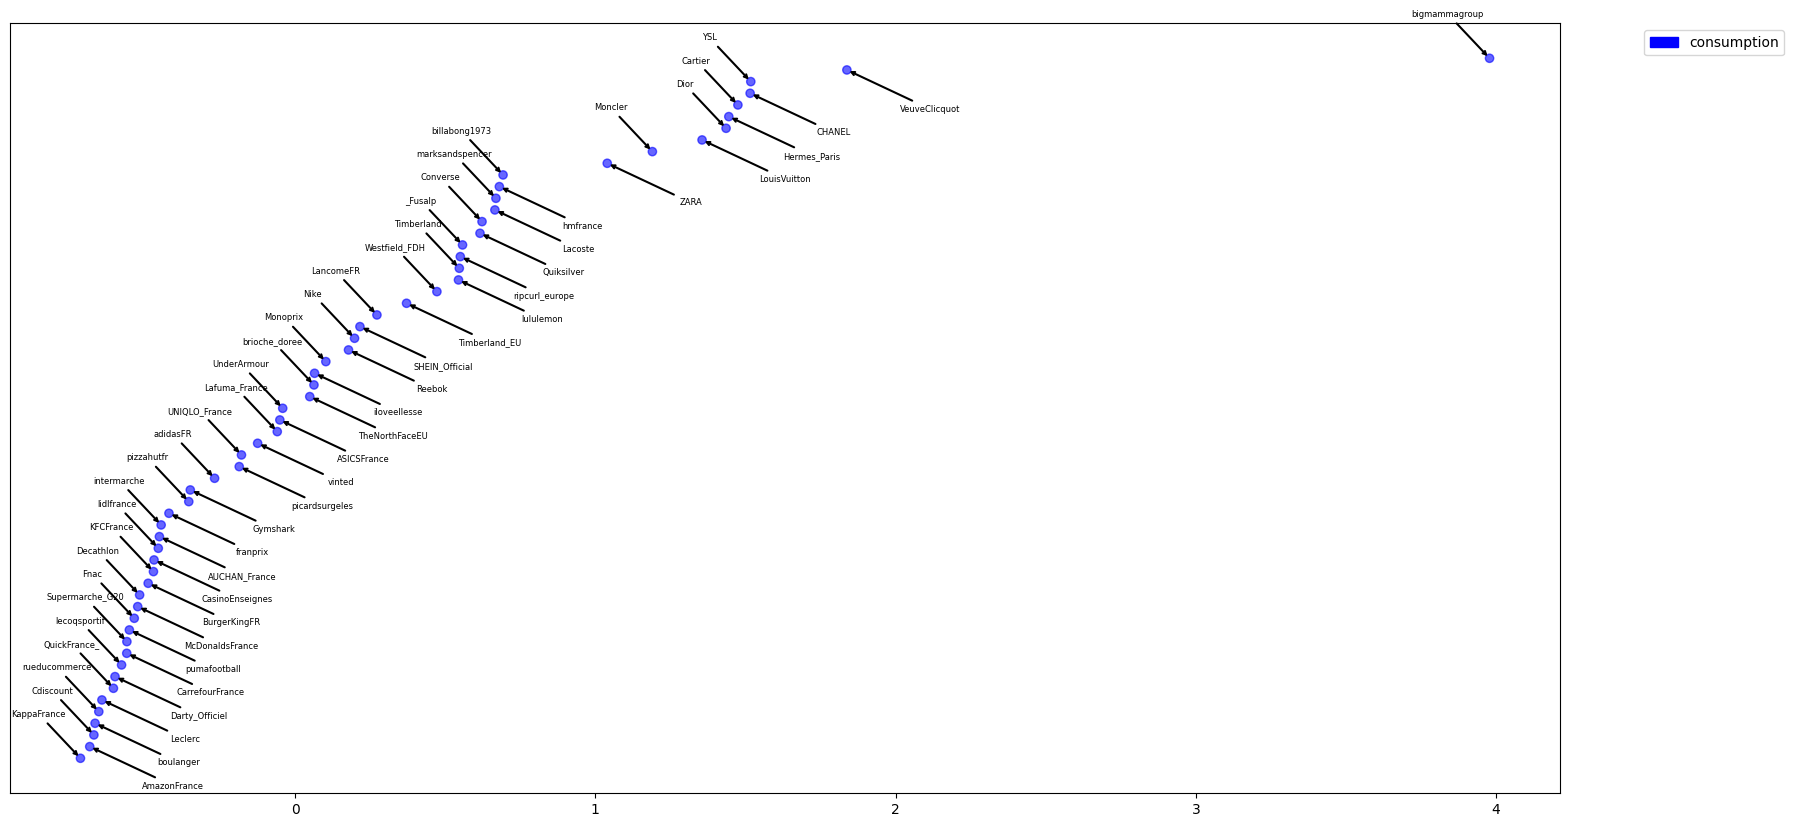

In [84]:

utils2.full_plot_function(df = marker_7, dimension = 'projection', types_to_plot = 'all', type_style = "new", fontsize=6)

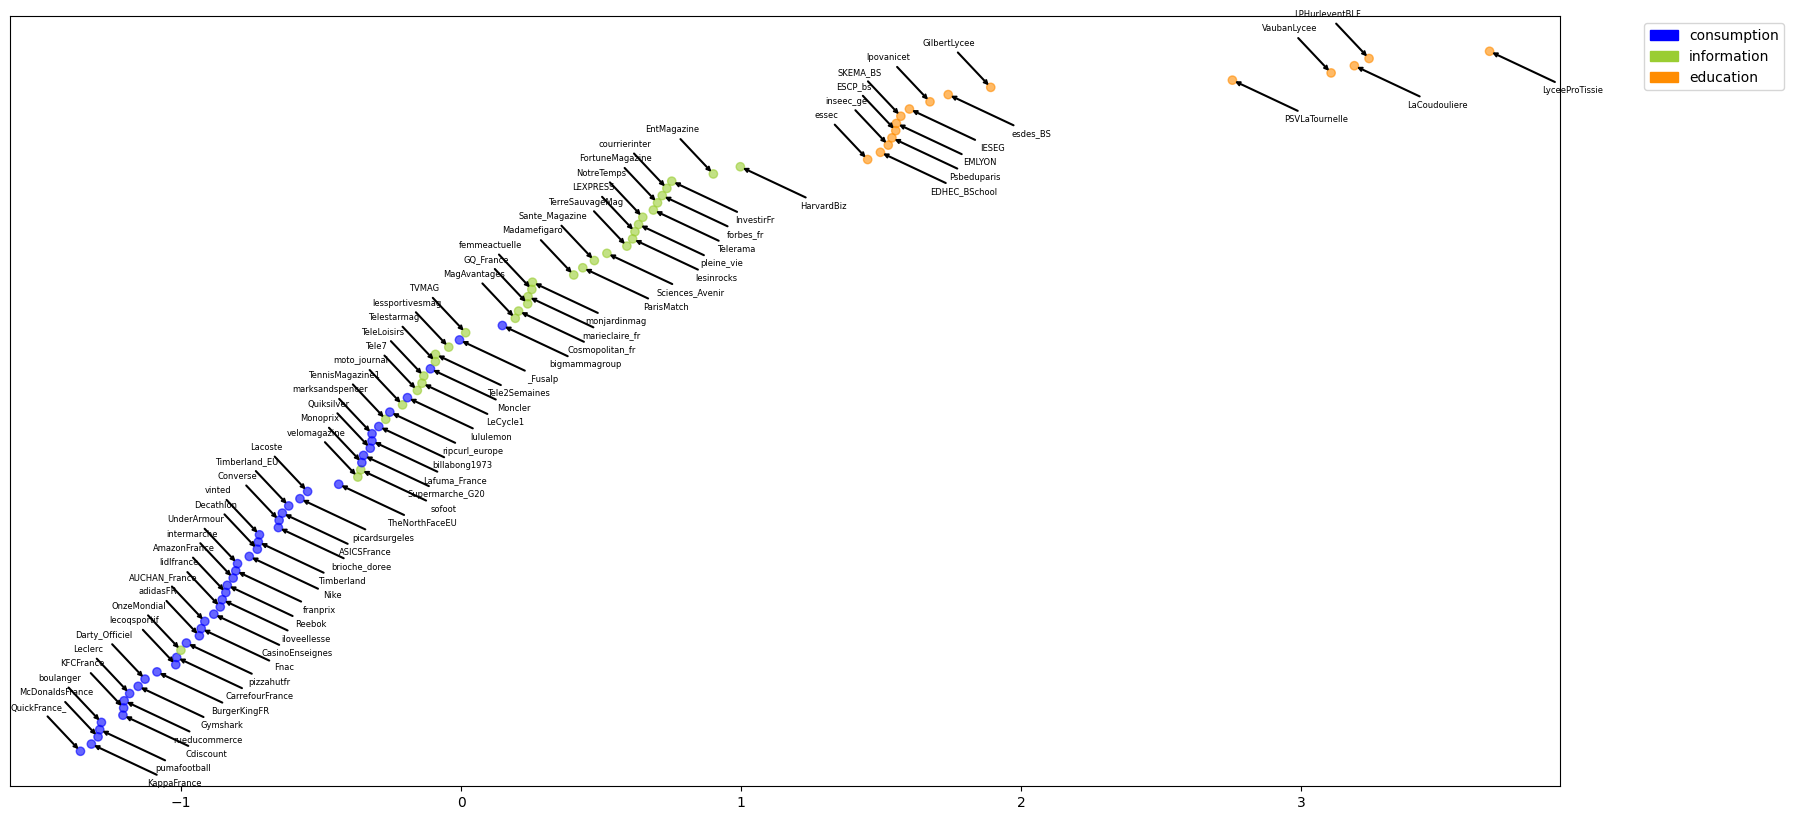

In [39]:
utils2.full_plot_function(df = marker_7, dimension = '0', types_to_plot = 'all', type_style = "new", fontsize=6)

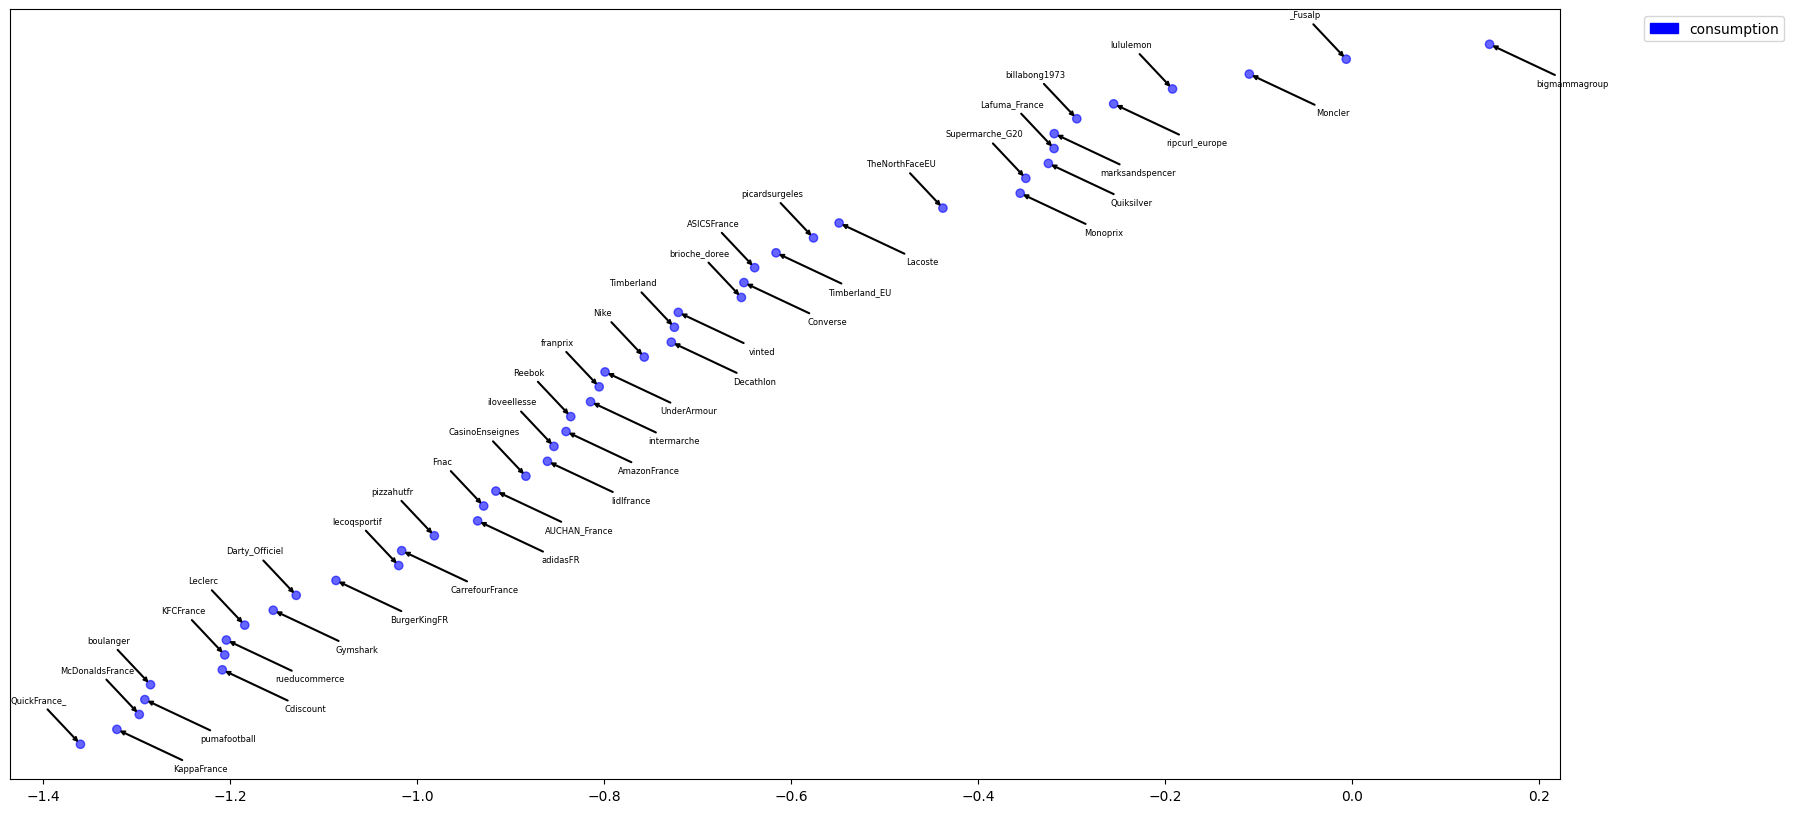

In [42]:
utils2.full_plot_function(df = marker_7, dimension = '0', types_to_plot = ['consumption'], type_style = "new", fontsize=6)

### Users

In [85]:
#Load m5 data for users

path = '/home/livtollanes/NewData/coordinates/m5_coords'
file = '/m5_row_coordinates.csv'
user_7 = pd.read_csv(path+file, index_col=0)

#drop dim 4
user_7 = user_7.drop(columns=['3'])


#Load the full edgelist with type labels to plot 

path = '/home/livtollanes/NewData/french/'
file = '/french_edgelist_marker_threshold.csv'
edgelist_types = pd.read_csv(path+file)

In [86]:
user_7.head()

,0,1,2
follower_id,,,
1000000204685312001,-1.253945,0.213011,-0.458228
1000005920372518912,-1.253040,0.187276,-0.371646
1000009184577015809,0.766218,-0.190940,0.460632
1000010098448715776,0.651215,-0.218138,0.525923
1000010843931774977,-1.197102,0.173419,-0.341874


Constructed file path: /home/livtollanes/NewData/coordinates/m7_coords/m7_column_coordinates.csv
Outputs for CORG functionality 2. Model number 7
Decision boundary:
[1.3550719742637876, 0.3109121241614961, 0.09789777587458585, -1.259039057393409]
Hyperplane Unit Normal (new found direction):
[0.9722661388134645, 0.22307990734811298, 0.0702417984843369]
Functionality 2 metrics for model number 7
Precision=1.000, Recall=0.333, F1-score=0.500, 


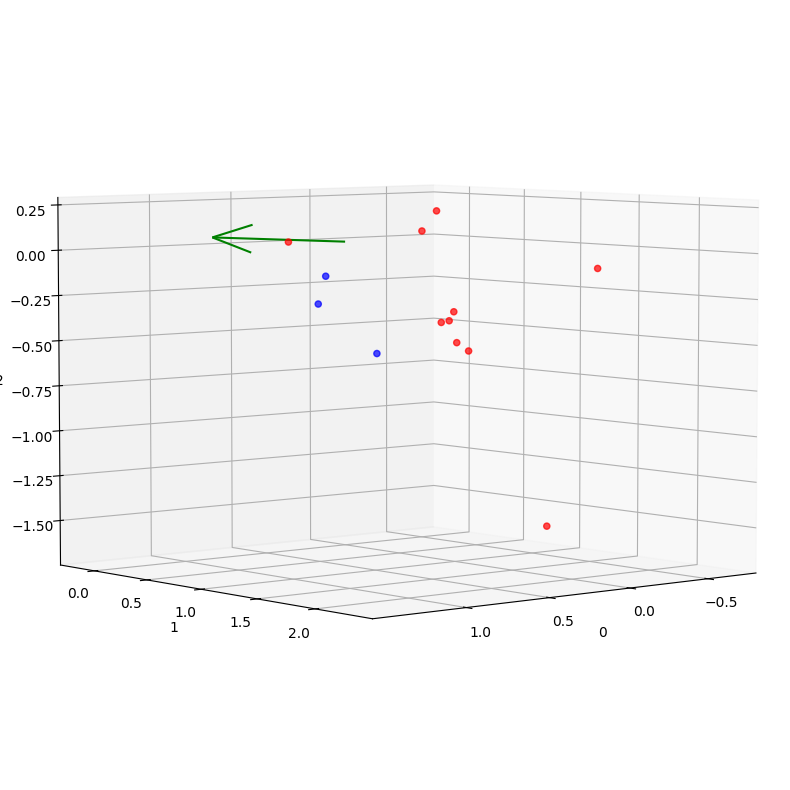

In [87]:
#CORG functionality 2 for model 1- to load the coordinates of the hyperplane unit normal (new direction vector)
importlib.reload(corg_pipeline)

m7 = corg_pipeline.CorgPipeline(7, n_dimensions=3)
m7.func2()

In [88]:
#Do the projection
importlib.reload(utils2)
unit_normal =  m7.discover_model.decision_hyperplane_unit_normal # [0.9784190456931475, -0.17914052824415197, -0.10297981435852589]
dimensions = ['0', '1', '2']
user_7 = m7.create_user_projection(unit_normal, dimensions)



In [89]:
#Load the bios - we want to reorder the texts to match the order of the user coordinates in the new column
path = '/home/livtollanes/NewData/french/'
file = '/french1_updated.csv'
bios = pd.read_csv(path+file)

In [90]:
user_7_bios = user_7.merge(bios[['follower_id', 'screen_name', 'description_cleantext']], on='follower_id', how='left')

In [91]:
pd.set_option('display.max_colwidth', None)
user_7_bios[['screen_name', 'projection', 'description_cleantext']].tail(50)

,screen_name,projection,description_cleantext
100600,secondebarre,-1.562629,"j’adore ma ville , ma région et le Castres Olympique"
100601,anouchka8510,-1.562629,"I love #PSG, le GOLF et plein de choses encore autre que le sport !"
100602,BatistePetrieux,-1.562629,Dans la communication chez @oxfamfrance Membre du Board @IKF_officiel Un peu chez @mediafootclub & @MediaGolfClub J’essaye de faire les choses bien...
100603,Nikko_Pronos,-1.562629,#SORARE #PSG #STAKEModérateur sur http://twitch.tv/psg 30€ Offerts sur @Stake avec le code : SNA - http://bit.ly/30Offerts #ad
100604,SCOFondation,-1.562629,Compte off. de SCO FONDS DOTATION... oeuvre pour le bien-être des enfants autour de 3 piliers : santé-emploi-actions dans les quartiers. @AngersSCO
100605,TexMaxime,-1.562629,Community manager de @USforcefootball et également Président. Nantais Photographe de métier.
100606,BlaZerrFNNN,-1.562629,@cristiano @SLBenfica @selecaoportugal Ronaldo restera à jamais le et le plus grand joueur de l'histoire BERNARDO MÉRITE SA LDC
100607,samiaf49,-1.562629,"Aidant familial, j'habite le 20ème arrondissement depuis de nombreuses années.Conseillère de quartier Gambetta. et"
100608,GaggioliC,-1.562629,"Étudiant à la Fac de Sciences et Technologies de Nancy / Membre de CENS, PHI-SCIENCES"
100609,Son_and_graf,-1.562629,"Graphiste freelance de métier, j'ai décidé de mettre à mon panel de créations le design de kit sportif afin de vous les partager ici"


In [92]:
user_7_bios.shape

(100650, 7)

In [93]:
# #save user_1_bios to csv

# user_7_bios.to_csv('/home/livtollanes/NewData/coordinates/dim_X/m7_dimx_users_bios.csv')